In [73]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,867 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and dire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

import matplotlib

## 202211964 이재민
한국 박스오피스 2021년 1월~ 2023년 12월 까지의 데이터를 가져와 분석을 시작해였습니다.

주제로는 '한국에서 무슨 영화를 만들어야 흥행 할 수 있을까?'라는 생각으로 데이터 분석을 진행하기로 했습니다.

In [2]:
df =  pd.read_csv('/content/dataset2023_1.csv')

df.head()

,순위,영화명,개봉일,매출액,매출액\n점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,범죄도시2,2022-05-18,131298796478,0.060,131298796478,12693415,12693415,2521,355768,한국,한국,"주식회사 빅펀치픽쳐스,(주)홍필름,(주)비에이엔터테인먼트","주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",15세이상관람가,"범죄,액션",이상용,"마동석,손석구,최귀화,박지환,허동원,하준,정재광,남문철,박지영,이주원,음문석,김찬형..."
1,2,아바타: 물의 길,2022-12-14,137647702899,0.063,137647702899,10805065,10805065,2809,283037,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,어드벤처,SF,스릴러",제임스 카메론,"조 샐다나,샘 워싱턴,시고니 위버,스티븐 랭,케이트 윈슬렛"
2,3,범죄도시3,2023-05-31,104687737771,0.048,104687737771,10682813,10682813,2582,311915,한국,한국,"주식회사 빅펀치픽쳐스,(주)홍필름,(주)비에이엔터테인먼트","주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",15세이상관람가,"범죄,액션",이상용,"정호진,마동석,황순명,이준혁,아오키 무네타카,이범수,김민재,이지훈,김도건,고규필,전..."
3,4,탑건: 매버릭,2022-06-22,88294079794,0.040,88294079794,8224327,8224327,1975,252791,미국,미국,NaN,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,액션,조셉 코신스키,"톰 크루즈,마일즈 텔러,제니퍼 코넬리,존 햄,에드 해리스,글렌 포웰,제이 엘리스,그..."
4,5,스파이더맨: 노 웨이 홈,2021-12-15,75193912210,0.034,75193912210,7551990,7551990,2948,276695,미국,미국,NaN,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,12세이상관람가,"액션,어드벤처,SF",존 왓츠,"톰 홀랜드,젠데이아 콜먼,베네딕트 컴버배치,제이콥 배덜런,존 파브로,마리사 토메이"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6199 entries, 0 to 6198
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   순위       6199 non-null   object 
 1   영화명      6198 non-null   object 
 2   개봉일      3341 non-null   object 
 3   매출액      6199 non-null   int64  
 4   매출액
점유율  6198 non-null   float64
 5   누적매출액    6199 non-null   int64  
 6   관객수      6199 non-null   int64  
 7   누적관객수    6199 non-null   int64  
 8   스크린수     6199 non-null   int64  
 9   상영횟수     6199 non-null   int64  
 10  대표국적     6169 non-null   object 
 11  국적       6169 non-null   object 
 12  제작사      1681 non-null   object 
 13  배급사      3337 non-null   object 
 14  등급       3524 non-null   object 
 15  장르       6113 non-null   object 
 16  감독       4180 non-null   object 
 17  배우       2095 non-null   object 
dtypes: float64(1), int64(6), object(11)
memory usage: 871.9+ KB


## 데이터 클렌징
흥행을 하기위해서 관객수가 1만명이하이거나 스크린 수가 100개 이하의 경우에는 분석을 하는데 오차를 주는 더미 데이터를 주는 값이라 생각하여 삭제해였다.

그리고 정확한 분석을 위해서 NAN값도 제거가기 위해서 dropna를 이용하였다.


In [5]:
df_filtered = df[df['관객수'] > 10000]
df_filtered = df_filtered[df_filtered['스크린수'] >= 100]
df_filtered = df_filtered.dropna()
df_filtered = df_filtered.reset_index(drop=True)
for a in range(0,118):
  df_filtered['순위'][a] = a+1

df_filtered

,순위,영화명,개봉일,매출액,매출액\n점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,범죄도시2,2022-05-18,131298796478,0.060,131298796478,12693415,12693415,2521,355768,한국,한국,"주식회사 빅펀치픽쳐스,(주)홍필름,(주)비에이엔터테인먼트","주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",15세이상관람가,"범죄,액션",이상용,"마동석,손석구,최귀화,박지환,허동원,하준,정재광,남문철,박지영,이주원,음문석,김찬형..."
1,2,범죄도시3,2023-05-31,104687737771,0.048,104687737771,10682813,10682813,2582,311915,한국,한국,"주식회사 빅펀치픽쳐스,(주)홍필름,(주)비에이엔터테인먼트","주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",15세이상관람가,"범죄,액션",이상용,"정호진,마동석,황순명,이준혁,아오키 무네타카,이범수,김민재,이지훈,김도건,고규필,전..."
2,3,한산: 용의 출현,2022-07-27,73706332377,0.034,73706332377,7265618,7265618,2223,217731,한국,한국,(주)빅스톤픽쳐스,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,"액션,드라마",김한민,"박해일,이지영,김시국,이정태,변요한,안성기,손현주,김성규,김성균,김향기,옥택연,공명..."
3,4,공조2: 인터내셔날,2022-09-07,70918411586,0.032,70918411586,6983077,6983077,2389,275817,한국,한국,"(주)제이케이필름,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,"액션,코미디",이석훈,"현빈,유해진,임윤아,다니엘 헤니,진선규,장영남,박훈,임성재,윤상화,박민하,전국환,전..."
4,5,밀수,2023-07-26,49683699003,0.023,49683699003,5143103,5143103,1932,167668,한국,한국,(주)외유내강,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,액션,류승완,"김혜수,염정아,조인성,박정민,김종수,고민시,김재화,박준면,박경혜,주보비,곽진석,정도..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,113,오픈 더 도어,2023-10-25,160931400,0.000,160931400,19202,19202,213,3597,한국,한국,㈜컨텐츠랩 비보,"(주)콘텐츠판다,(주)비에이엔터테인먼트",15세이상관람가,"미스터리,스릴러",장항준,"이순원,서영주,김수진,강애심"
113,114,나는 여기에 있다,2023-04-12,143076700,0.000,143076700,18504,18504,122,1280,한국,한국,(주)미학인우주선,와이드 릴리즈(주),15세이상관람가,"범죄,액션,스릴러",신근호,"조한선,손동제,정진운,정태우,노수산나,박순천,정인기,이지원,조한준,송진영,손태양,민..."
114,115,심야카페: 미씽 허니,2022-11-17,98978194,0.000,98978194,13682,13682,174,1307,한국,한국,(주)케이드래곤,(주)영화특별시에스엠씨,12세이상관람가,"멜로/로맨스,판타지",정윤수,"이이경,채서진,신주환,정영주,박건일,문숙,김대건,조유하,심이영,송병훈,구교민,김나린..."
115,116,우리 사랑이 향기로 남을 때,2023-02-08,115424800,0.000,115424800,12364,12364,173,2732,한국,한국,"(주)도깨비미디어,주식회사 콘텐츠존","주식회사 콘텐츠존,(주)다자인소프트",15세이상관람가,"멜로/로맨스,코미디,드라마",임성용,"윤시윤,최훈재,설인아,문지인,김영웅,노상현,이규복,김수미,양혜진,김찬미,이동찬,최윤..."


In [6]:
df_ctg = df_filtered[['장르','국적','등급','배급사']]
df_ctg.head()

,장르,국적,등급,배급사
0,"범죄,액션",한국,15세이상관람가,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트"
1,"범죄,액션",한국,15세이상관람가,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트"
2,"액션,드라마",한국,12세이상관람가,롯데컬처웍스(주)롯데엔터테인먼트
3,"액션,코미디",한국,15세이상관람가,(주)씨제이이엔엠
4,액션,한국,15세이상관람가,(주)넥스트엔터테인먼트월드(NEW)


In [7]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [18]:
matplotlib.rcParams['font.family'] ='NanumBarunGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

## 분석하기
기초 통계량에 대한 정보만으로 데이터를 파악하는 데에는 한계가 있기 때문에 데이터의 세부적인 특성을 파악하기 위해서 데이터 시각화를 실시하였다.

변수의 특성에 따라 범주형 / 연속형 변수를 나눠서 시각화를 진행했다.

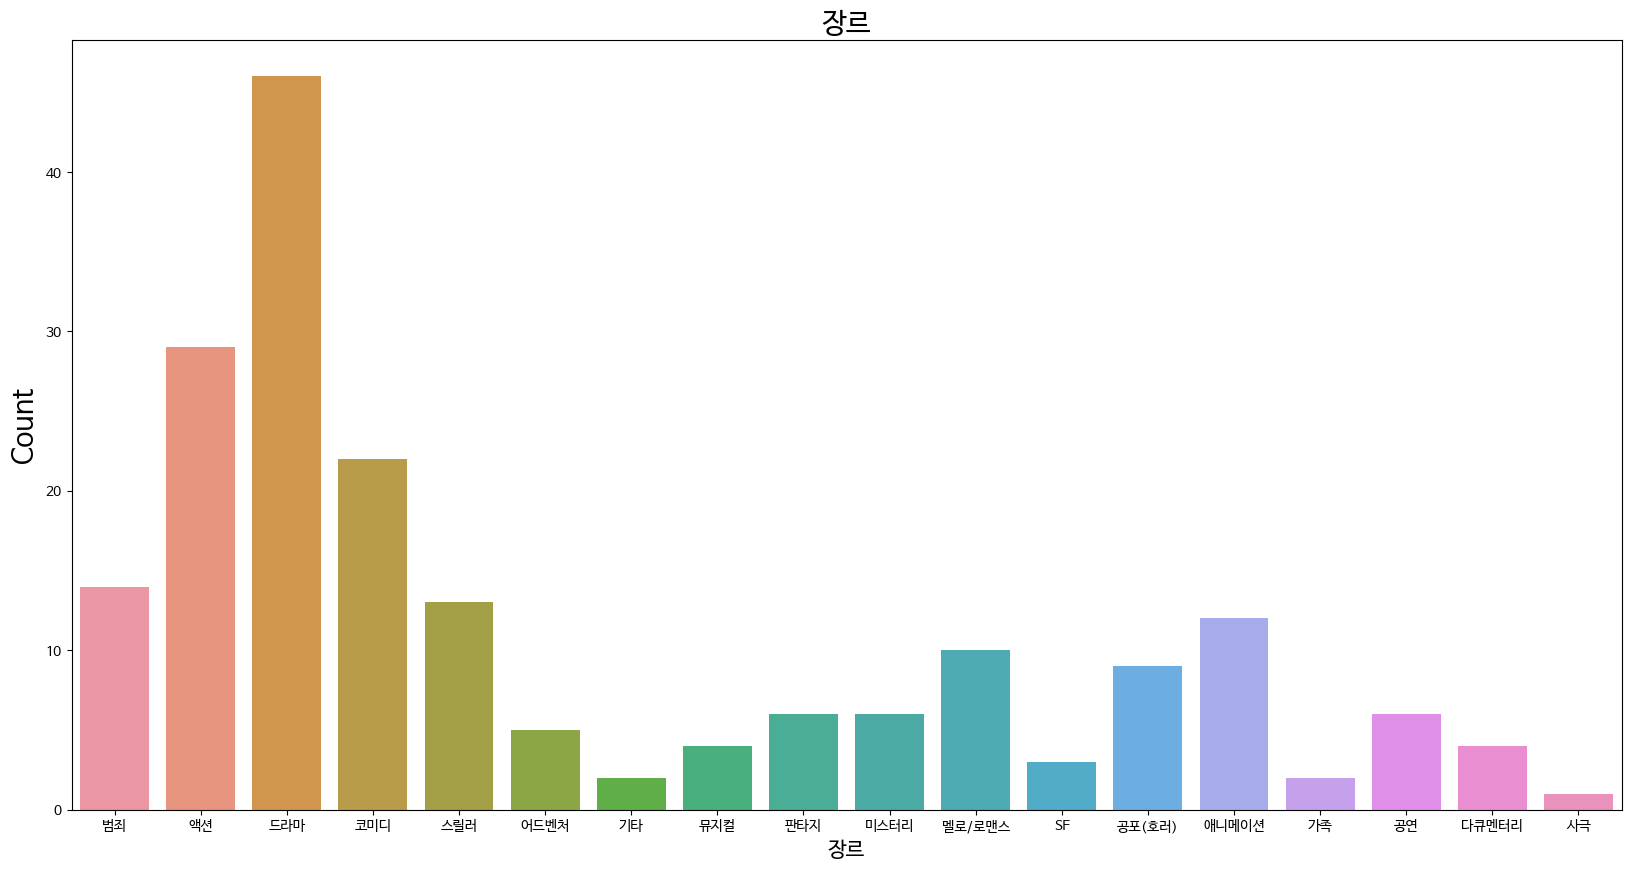

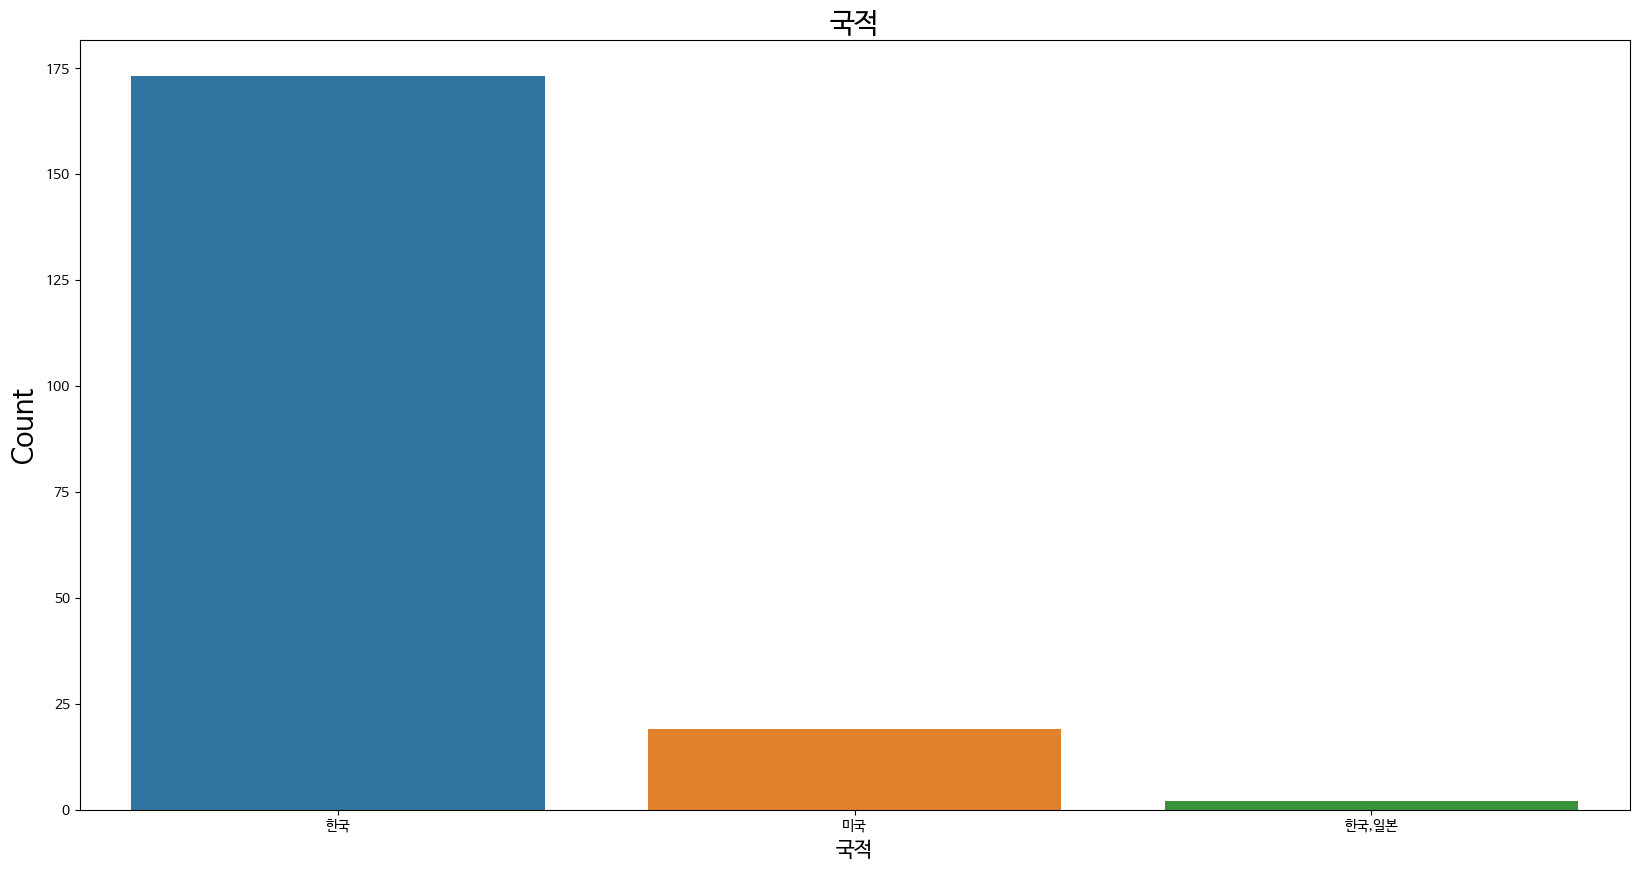

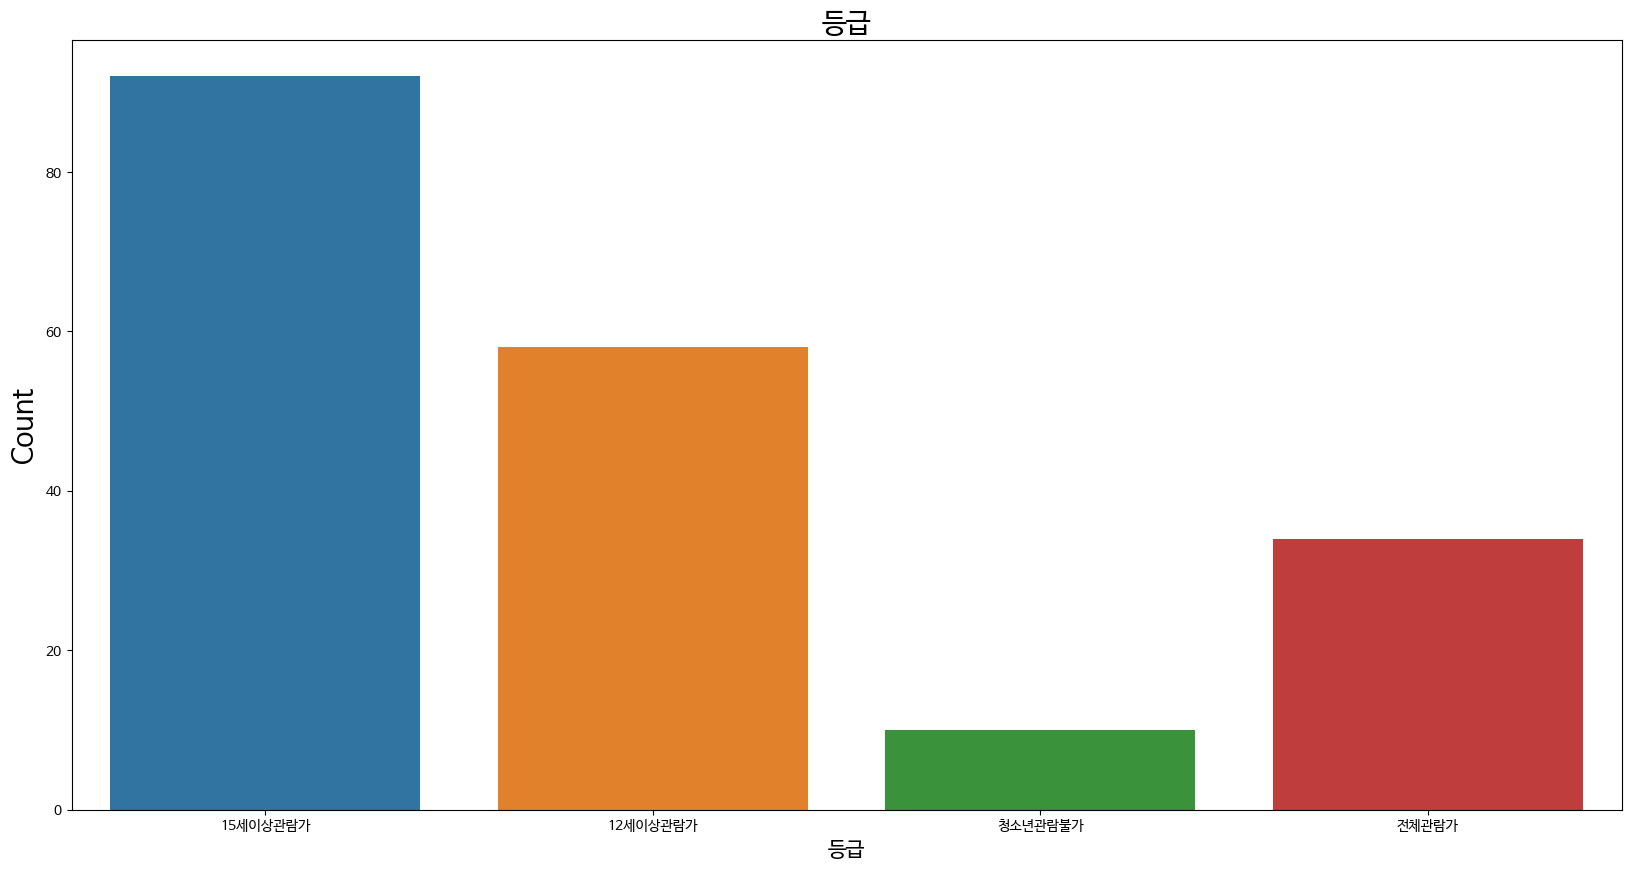

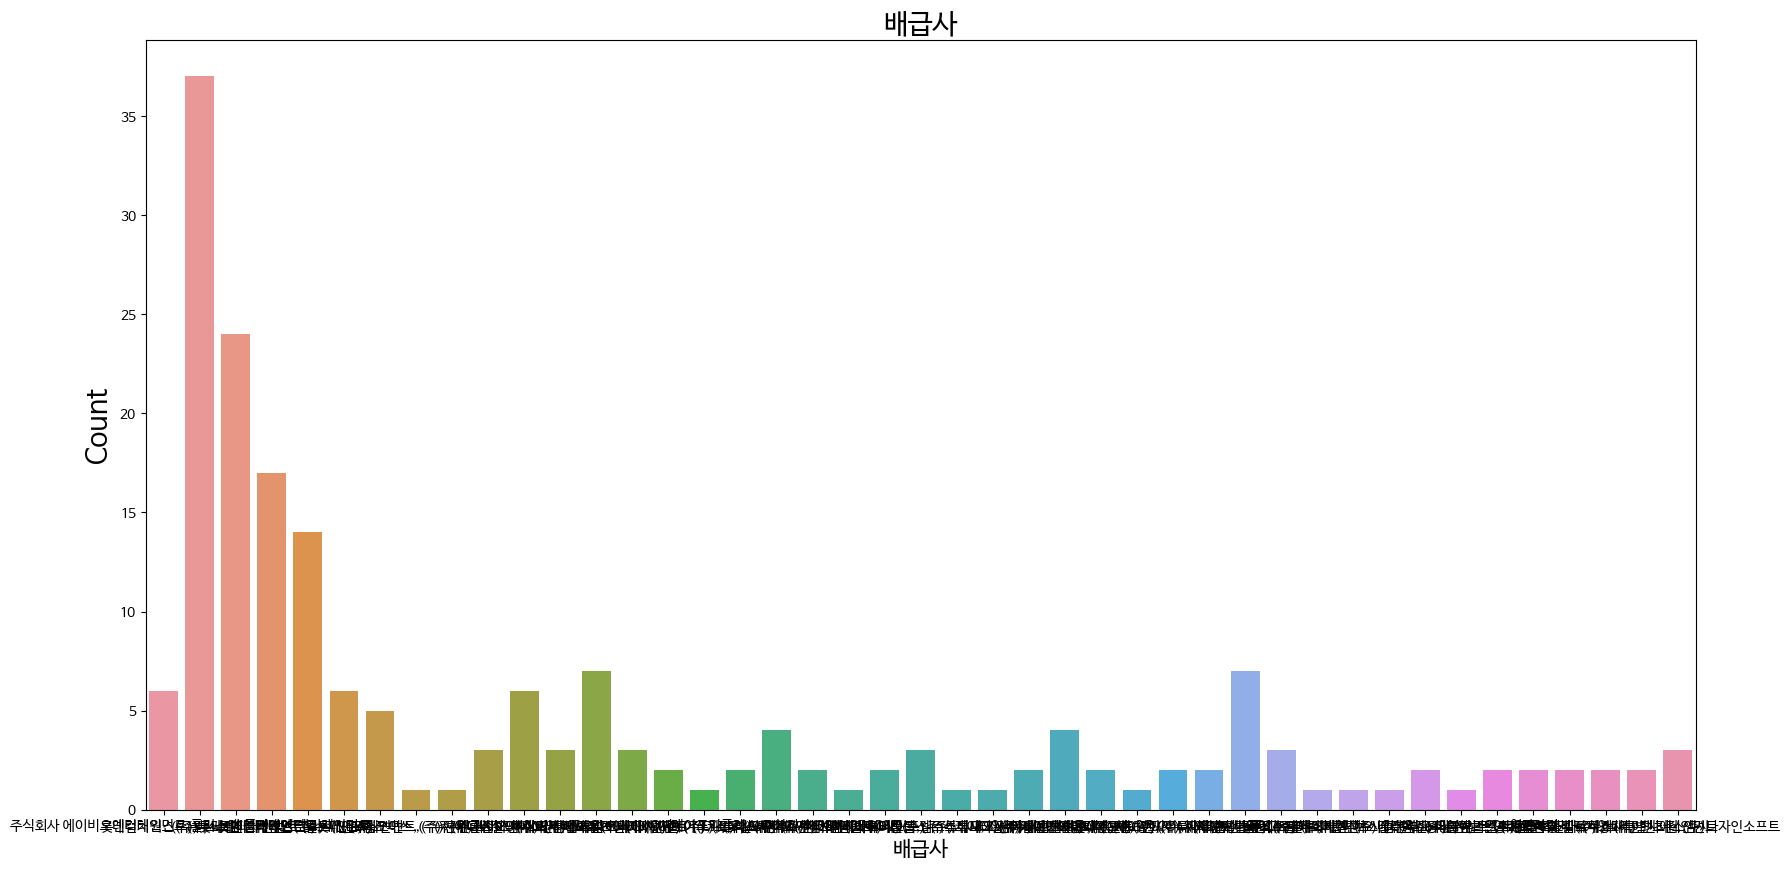

In [19]:
df_exploded = df_ctg.assign(장르=df_ctg['장르'].str.split(',')).explode('장르')

# 분리된 데이터로 countplot 그리기
for col in df_exploded.columns:
    plt.figure(figsize=(20,10))
    sns.countplot(data=df_exploded, x=col)
    plt.title(col, fontsize=20)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Count', fontsize=20)
    plt.show()

### 장르변수의 분포
를 봤을 때 '드라마','액션','범죄','코미디' 등 보편적으로 접근성이 높은 영화가 많다는 것을 확인할 수 있다.

#### 국가
박스오피스에서 상영한 국적은 한국과 미국,일본외의에는 없다는 것을 알 수 있다.
 따라서 국가의 영화들은 상대적으로 비중이 매우 낮기 때문에 country 변수를 모델에 학습할 때 이러한 부분을 고려해야 한다.

#### 등급
 관람객 등급 분포에서는 상대적으로 '15세이상관람가', '12세이상관람가' 분포가 많은 것을 확인할 수 있다.

 그래도 다른 값들에 비해 고르게 분포되었있는 것을 알 수 있었다.


 #### 배급사
 의 경우에는 배급사가 매우 다양하지만, 등장 빈도의 분포는 일부 배급사에 집중되어 있다는 것을 알 수 있다.

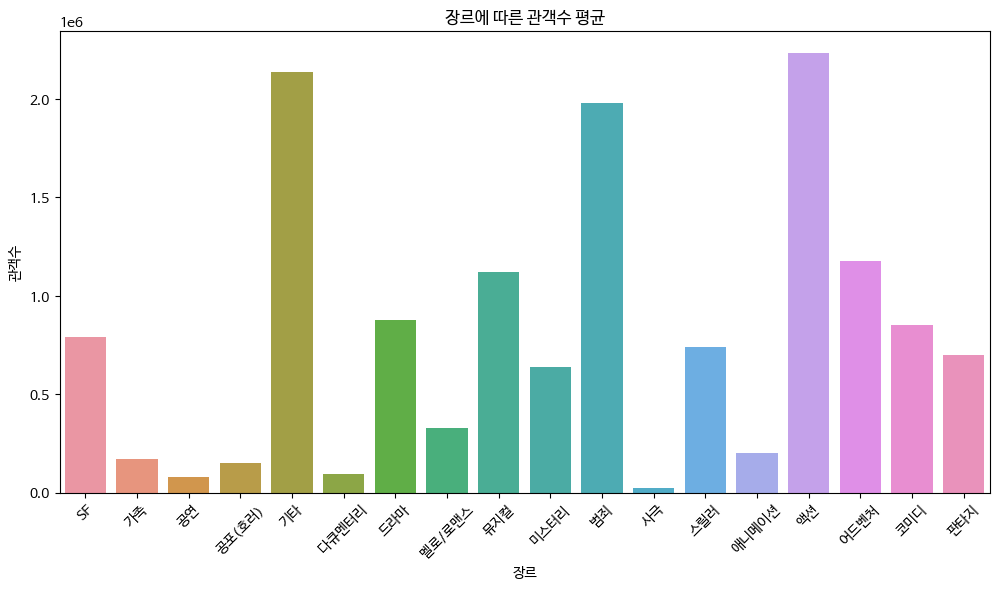

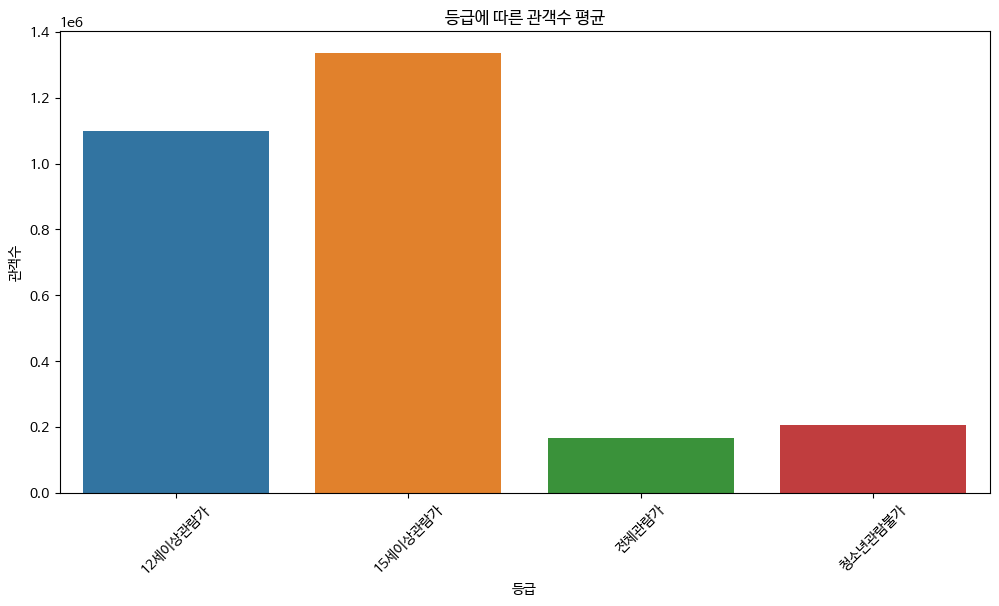

In [24]:
df_ctg = df_filtered[['장르','국적','등급','배급사','관객수']]
df_exploded = df_ctg.assign(장르=df_ctg['장르'].str.split(',')).explode('장르')

genre_audience = df_exploded.groupby('장르')['관객수'].mean().reset_index()

rating_audience = df_exploded.groupby('등급')['관객수'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_audience, x='장르', y='관객수')
plt.title('장르에 따른 관객수 평균')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=rating_audience, x='등급', y='관객수')
plt.title('등급에 따른 관객수 평균')
plt.xticks(rotation=45)
plt.show()

#상관계수 구하기
영화 흥행의 위해서 관객수가 가장 중요하다고 생각하기에 위에서 관객수에 직결된다고 생각하는 등급과 장르를 이용하여 상관계수를 구하고자 한다.

하지만 '장르'와 '등급'이 범주형 변수이고, '관객수'가 연속형 변수이므로, '장르'와 '관객수', '등급'과 '관객수' 간의 관계를 별도로 분석하는 것이 더 적합하다.

이를 위해 각 장르와 등급 별로 관객수의 평균을 계산한 후, 이 데이터를 사용하여 관계를 분석했다.

그리고 이를 정확히 알기 위해서 시각화를 시켜줬다.


# 결과
장르에서 가장 많은 비율을 차지하던 드라마와 등급에서 가장많은 비율을 차지한 12세 등급제한이지만 관객수에 가장 영향을 끼친 것은 기타를 제외한 범죄와 액션이 차지한다.

그리고 15세제한 등급에서 관객수가 가장 많은 비율을 차지한다.

## 그러므로
흥행하기 위한 영화를 만들기 위해서는 범죄와 액션장르에 이의 특성을 살릴 기타 속성을 부여한 15세제한 등급의 영화를 제작해야한다.


In [27]:
from scipy.stats import chi2_contingency
cross_tab = pd.crosstab(df_exploded['장르'], df_exploded['등급'])

# 카이제곱 검증 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

print(f"카이제곱 값: {chi2}")
print(f"P-value: {p}")

카이제곱 값: 188.15724618279367
P-value: 1.3555003050119383e-17


## 추가 증명

마지막 결과에서 액션과 범죄영화에서 15세 제한이 아닌 다른 나이대의 영화에서 더 좋은 성적을 낼 수 있기 때문에 장르와 등급에 관한 연관성을 확인해야한다.

그래서 두 개의 범주형 데이터의 관계를 확인하기위헤서 카이제곱 검증을 이용하여 확인하기로 하였다.

카이제곱 값은 188.6으로 이는 p-value값을 계산하기 위해서 사용됩니다.

p-value는 1.3 * 10^-17 으로 매우 작습니다. 일반적으로 p-값이 0.05 이하면, 두 변수 간에 통계적으로 유의한 관계가 있다고 판단됩니다.

그러기에 위의 결과가 성립한다고 정리할 수 있습니다.
